# Diagramas de dispersión - Scatters

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns #for plotting
import matplotlib.pyplot as plt
from matplotlib import pylab
from scipy import stats

from scipy.stats import spearmanr,pointbiserialr  # for Spearman Correlation and Biserial
from statsmodels.stats.stattools import durbin_watson
from sklearn import preprocessing

import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.metrics import confusion_matrix
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import anderson, norm, uniform
from skgof import cvm_test, ks_test
import statsmodels.stats.diagnostic as sm_diagnostic

from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
data = pd.read_csv("dfMedidas1.csv")
df = data.copy()

In [3]:
df.head()

,Dia,Dia_mes,Mes,Dia_sem,Lluvia,Fecha,T_MAX,T_MIN,Viento_MAX,Viento_MED,...,NO_MAX,NO2_MAX,PM2.5_MAX,PM10_MAX,O3_MAX,TOL_MAX,BEN_MAX,EBE_MAX,TCH_MAX,NMCH_MAX
0,1,1,ENE,J,0.0,2015-01-01,10.7,-0.6,14,5,...,244,127,33,64,20,9.1,3.9,1.9,2.44,1.00
1,2,2,ENE,V,0.0,2015-01-02,12.5,-0.4,11,5,...,327,165,23,36,22,11.5,4.0,2.4,2.31,0.92
2,3,3,ENE,S,0.0,2015-01-03,11.7,1.4,14,8,...,301,143,22,30,24,12.8,3.6,2.1,2.43,0.93
3,4,4,ENE,D,0.0,2015-01-04,14.4,1.4,12,6,...,270,141,20,33,32,11.9,3.5,2.6,2.24,0.92
4,5,5,ENE,L,0.0,2015-01-05,12.3,2.0,19,9,...,248,123,22,31,25,9.9,3.1,2.4,2.31,0.94


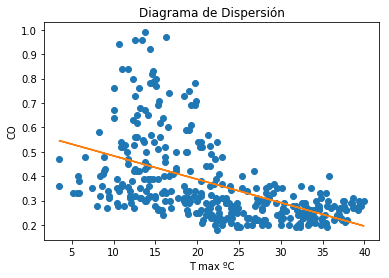

In [4]:
xi = df.T_MAX
y = df.CO
slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
line = slope*xi+intercept

plt.plot(xi,y,'o', xi, line)
plt.xlabel("T max ºC")
plt.ylabel("CO")
plt.title('Diagrama de Dispersión')
ax = plt.gca()
fig = plt.gcf()

# plot(T_MAX, CO, main="Diagrama de Dispersión", xlab="T max ºC", ylab="CO", pch=19)
# abline(lm(CO ~ T_MAX), col = "red") # regresión (y~x)

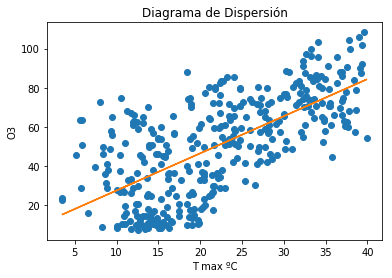

In [42]:
xi = df.T_MAX
y = df.O3
slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
line = slope*xi+intercept

plt.plot(xi,y,'o', xi, line)
plt.xlabel("T max ºC")
plt.ylabel("O3")
plt.title('Diagrama de Dispersión')
ax = plt.gca()
fig = plt.gcf()

# plot(T_MAX, O3, main="Diagrama de Dispersión", xlab="T max ºC", ylab="O3", pch=19)
# abline(lm(O3 ~ T_MAX), col = "red") # regresión (y~x)

In [47]:
df.corr()

,Dia,Dia_mes,Lluvia,T_MAX,T_MIN,Viento_MAX,Viento_MED,SO2,CO,NO,...,NO_MAX,NO2_MAX,PM2.5_MAX,PM10_MAX,O3_MAX,TOL_MAX,BEN_MAX,EBE_MAX,TCH_MAX,NMCH_MAX
Dia,1.000000,0.095131,-0.025115,0.190629,0.300988,-0.271643,-0.286813,0.190222,0.076452,0.171726,...,0.198861,0.076015,0.336121,0.254277,-0.221987,0.029124,0.122400,0.021628,-0.443385,-0.739330
Dia_mes,0.095131,1.000000,-0.000395,-0.012283,-0.014743,0.125960,0.054054,-0.064034,-0.098272,-0.108103,...,-0.093850,-0.104356,-0.119935,-0.159312,0.021452,-0.105318,-0.083204,-0.094678,-0.109306,-0.019789
Lluvia,-0.025115,-0.000395,1.000000,-0.120502,-0.022188,0.160457,0.136657,-0.091098,-0.104398,-0.120208,...,-0.119712,-0.130772,-0.110517,-0.148561,0.027092,-0.092900,-0.058365,-0.074858,-0.098632,0.031177
T_MAX,0.190629,-0.012283,-0.120502,1.000000,0.941484,0.149109,0.152920,-0.518337,-0.516272,-0.413155,...,-0.431650,-0.294018,-0.074646,0.279006,0.611183,-0.328394,-0.422632,-0.360226,-0.161037,-0.275766
T_MIN,0.300988,-0.014743,-0.022188,0.941484,1.000000,0.185992,0.183890,-0.573904,-0.596274,-0.490523,...,-0.502518,-0.399331,-0.110633,0.225517,0.588075,-0.354989,-0.449193,-0.404112,-0.243916,-0.347277
Viento_MAX,-0.271643,0.125960,0.160457,0.149109,0.185992,1.000000,0.919605,-0.542835,-0.601700,-0.593030,...,-0.592765,-0.603150,-0.541741,-0.298431,0.565617,-0.457100,-0.567464,-0.490170,-0.236809,0.148022
Viento_MED,-0.286813,0.054054,0.136657,0.152920,0.183890,0.919605,1.000000,-0.521946,-0.577966,-0.573885,...,-0.568227,-0.561899,-0.509416,-0.262519,0.561531,-0.433468,-0.557729,-0.466444,-0.245110,0.140612
SO2,0.190222,-0.064034,-0.091098,-0.518337,-0.573904,-0.542835,-0.521946,1.000000,0.934681,0.912839,...,0.928388,0.844065,0.666969,0.362112,-0.731610,0.609649,0.750767,0.632783,0.283942,-0.035790
CO,0.076452,-0.098272,-0.104398,-0.516272,-0.596274,-0.601700,-0.577966,0.934681,1.000000,0.969395,...,0.964424,0.913700,0.718439,0.408921,-0.761076,0.730351,0.853201,0.745915,0.410836,0.085464
NO,0.171726,-0.108103,-0.120208,-0.413155,-0.490523,-0.593030,-0.573885,0.912839,0.969395,1.000000,...,0.979737,0.892168,0.725074,0.444589,-0.746314,0.740656,0.820628,0.759730,0.386765,-0.011048


In [1]:
# library(car)
# scatterplot(O3 ~ T_MAX, data = dfMedidas, main ="Diagrama de Dispersión", 
#             xlab ="T max ºC", ylab ="O3", lwd = 2, lty= 2, col = "green", cex = 0.5,
#             ellipse = list(levels = c(.5, .95), robust = TRUE, fill = TRUE, fill.alpha = 0.1),  
#             regLine = list(method = lm, lty = 1, lwd = 2, col = "blue"),
#             smooth = list(smoother = loessLine, col.spread = "red", col.var = "red", lty.var = 2, lty.var = 4)
#            )

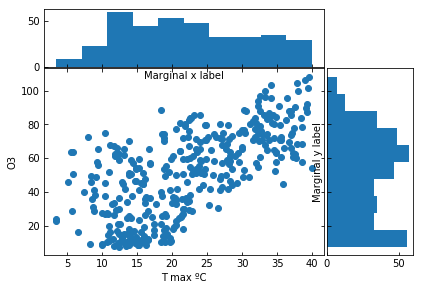

In [70]:
plt.figure(figsize=(8, 8))

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

# the scatter plot:
ax_scatter.scatter(df.T_MAX, df.O3)

ax_histx.hist(df.T_MAX)
ax_histy.hist(df.O3, orientation='horizontal')

ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())

ax_scatter.set_xlabel('T max ºC')
ax_scatter.set_ylabel('O3')

ax_histx.set_xlabel('Marginal x label')
ax_histy.set_ylabel('Marginal y label')


plt.show()

# scatter.hist(T_MAX, O3, main ="Diagrama de Dispersión", xlab ="T max ºC", ylab ="O3")
#Igual que la anterior pero con histogramas y coeficiente de regresión
# Same as above but with histograms and regression coefficient

In [5]:
df["Lluvia_SN"] = np.where(df['Lluvia'] > 0, 'Si','No')
df["PM2_half_UMBRAL"] = np.where(df['PM2.5'] >= 25, 'Si','No')
df["PM10_UMBRAL"] = np.where(df['PM10'] >= 50, 'Si','No')
df["T_MAX_ALERTA"] = np.where(df['T_MAX'] >= 36, 'A','V')
df["T_MAX_ALERTA"] = np.where(df['T_MAX'] >= 39, 'N', df["T_MAX_ALERTA"])
df["T_MAX_ALERTA"] = np.where(df['T_MAX'] >= 42, 'R', df["T_MAX_ALERTA"])

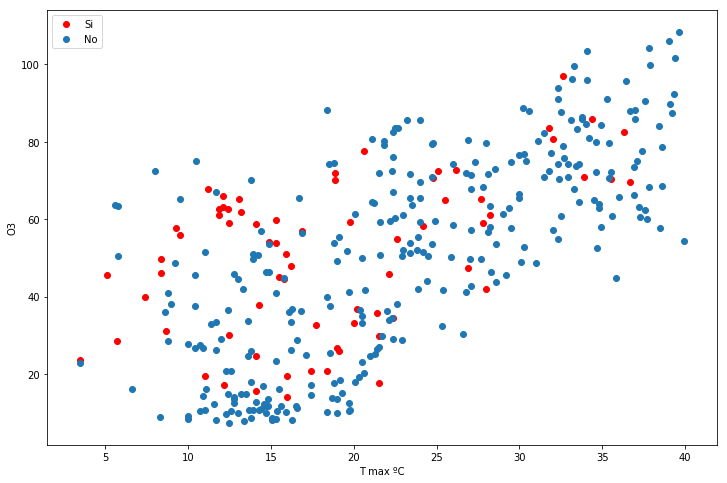

In [80]:
plt.figure(figsize=(12,8))
plt.scatter(x=df.T_MAX[df.Lluvia_SN=='Si'], y=df.O3[(df.Lluvia_SN=='Si')], c="red")
plt.scatter(x=df.T_MAX[df.Lluvia_SN=='No'], y=df.O3[(df.Lluvia_SN=='No')])
plt.legend(["Si", "No"])
plt.xlabel("T max ºC")
plt.ylabel("O3")
plt.show()

# scatterplot(O3 ~ T_MAX |Lluvia_SN, data = dfMedidas, main ="Diagrama de Dispersión", xlab ="T max ºC", ylab ="O3",smoother = TRUE)

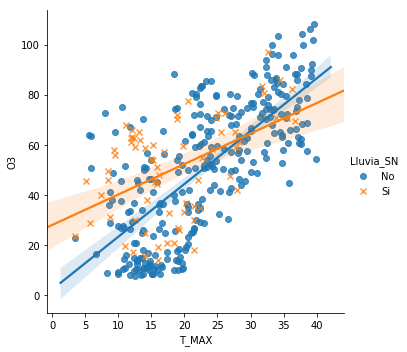

In [83]:
sns.lmplot(x="T_MAX", y="O3", hue="Lluvia_SN", data=df, markers=["o", "x"]);
# Visualizando relaciones lineales
# Visualizing linear relationships

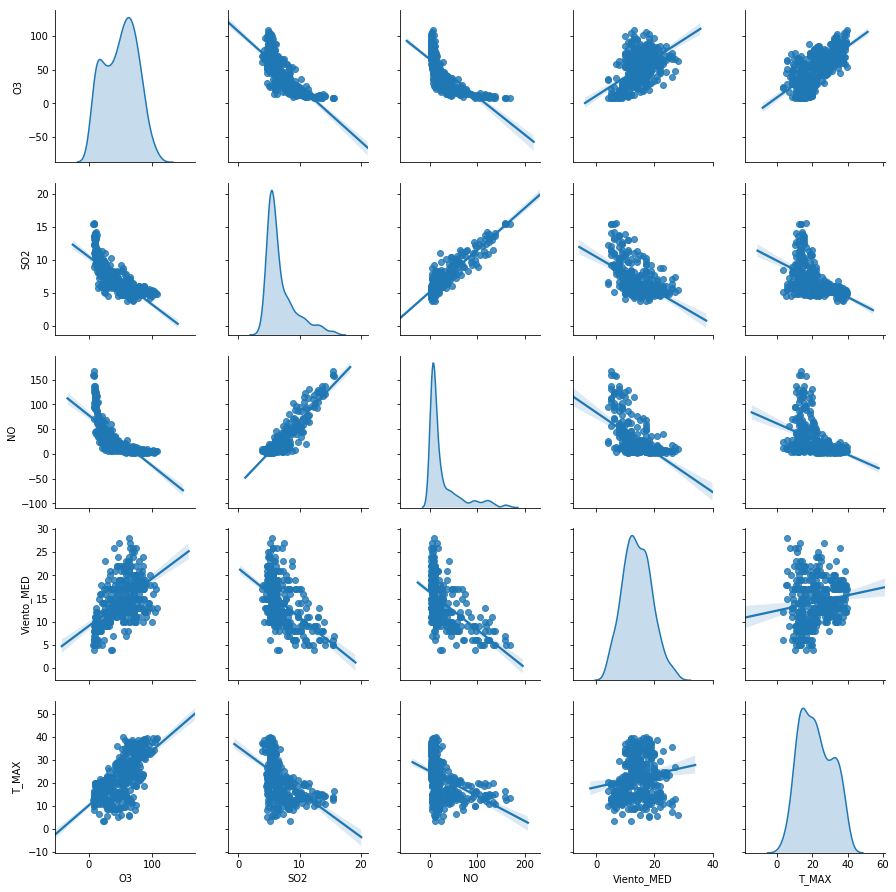

In [91]:
sns.pairplot(df, diag_kind="kde", kind="reg", vars=["O3","SO2","NO","Viento_MED","T_MAX"])

#scatterplotMatrix(~ O3 + SO2 + NO + Viento_MED + T_MAX, data = dfMedidas,
#                  smooth = list(smoother = loessLine, spread = TRUE, lty.smooth = 1, 
#                                lwd.smooth = 1.5, lty.spread = 3, lwd.spread = 1),
#                  ellipse = TRUE, cex = 0.25, col = "red", 
#                  regLine = list(method=lm, lty=1, lwd=2, col="blue")) 

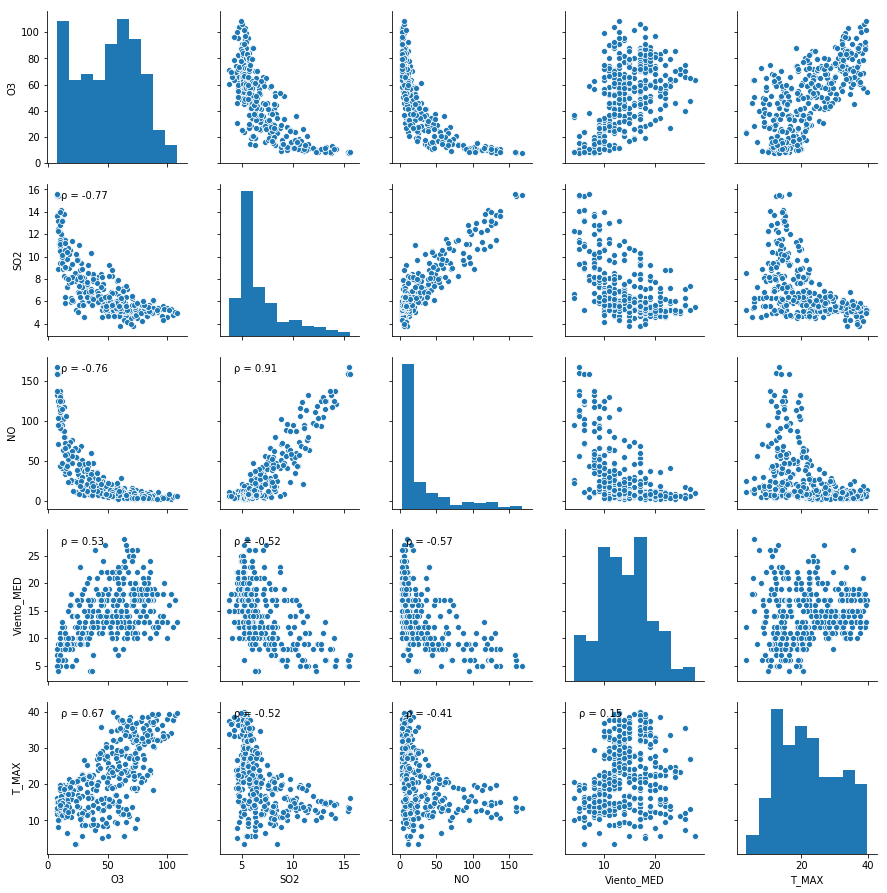

In [101]:
from scipy.stats import pearsonr

def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = '\u03C1'
    ax.annotate(f'{rho} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
    
g = sns.pairplot(df, vars=["O3","SO2","NO","Viento_MED","T_MAX"])
g.map_lower(corrfunc)
plt.show()

# library(PerformanceAnalytics)
# chart.Correlation(dfMedidas[,c("O3", "SO2", "NO", "Viento_MED", "T_MAX")])

## En ºC Covarianza - ºC Covariance

In [103]:
df.T_MIN.cov(df.CO)
# cov(T_MIN, CO)

-0.6855641860548576

In [104]:
df.T_MAX.cov(df.CO)
# cov(T_MAX, CO)

-0.7795665197733828

In [105]:
df.T_MIN.cov(df.O3)
# cov(T_MIN, O3)

112.9890720305653

In [106]:
df.T_MAX.cov(df.O3)
# cov(T_MAX, O3)

154.04658829336543

In [107]:
# T_MAX ~ O3

## En ºF Covarianza- ºF Covariance

In [109]:
((df.T_MIN* 9/5)+32).cov(df.CO)
# cov((T_MIN * 9/5)+32, CO)

-1.2340155348987436

In [110]:
((df.T_MAX* 9/5)+32).cov(df.CO)
# cov((T_MAX * 9/5)+32, CO)

-1.4032197355920872

In [111]:
((df.T_MIN* 9/5)+32).cov(df.O3)
# cov((T_MIN * 9/5)+32, O3)

203.3803296550176

In [112]:
((df.T_MAX* 9/5)+32).cov(df.O3)
# cov((T_MAX * 9/5)+32, O3)

277.28385892805795

## En ºC correlación - ºC Correlation

In [117]:
df.T_MIN.corr(df.CO)
# cor(T_MIN, CO)

-0.5962738103633948

In [118]:
df.T_MAX.corr(df.CO)
# cor(T_MAX, CO)

-0.5162716043067835

In [119]:
df.T_MIN.corr(df.O3)
# cor(T_MIN, O3)

0.6463094245771442

In [120]:
df.T_MAX.corr(df.O3)
# cor(T_MAX, O3)

0.6709398364651469

## En ºF Correlación - ºF Correlation

In [123]:
((df.T_MIN* 9/5)+32).corr(df.CO)
# cor((T_MIN * 9/5)+32, CO)

-0.5962738103633951

In [122]:
((df.T_MAX* 9/5)+32).corr(df.CO)
# cor((T_MAX * 9/5)+32, CO)

-0.516271604306783

In [124]:
((df.T_MIN* 9/5)+32).corr(df.O3)
# cor((T_MIN * 9/5)+32, O3)

0.646309424577145

In [125]:
((df.T_MAX* 9/5)+32).corr(df.O3)
# cor((T_MAX * 9/5)+32, O3)

0.6709398364651474

In [ ]:
# Pearson's correlation coefficient is bounded in the interval [-1,1], is dimensionless and has the sign of covariance.
# El coeficiente de correlación de Pearson está acotado en el intervalo [-1,1], es adimensional y tiene el signo de la covarianza.

In [126]:
df.CO.corr(df.SO2)
# cor(CO,SO2)

0.9346810559891234

In [129]:
spearmanr(df.O3,df.T_MAX)
# cor.test(O3,T_MIN, method = "spearman")

SpearmanrResult(correlation=0.6656528821197523, pvalue=4.533204137128098e-48)

In [133]:
spearmanr(df.O3,df.T_MIN)
# cor.test(O3,T_MIN, method = "spearman")

SpearmanrResult(correlation=0.6409665393161875, pvalue=1.2904804735960036e-43)

In [134]:
spearmanr(df.CO,df.T_MAX)
# cor(CO,T_MAX, method = "spearman")

SpearmanrResult(correlation=-0.6266669187417973, pvalue=3.2288079204578113e-41)

In [135]:
spearmanr(df.CO,df.T_MIN)
# cor.test(CO,T_MIN, method = "spearman")

SpearmanrResult(correlation=-0.6804987409332556, pvalue=5.838420512306858e-51)

In [ ]:
# En comparación con el valor de correlación de Pearson, se revela una posible relación inversa no lineal entre el monóxido de carbono y la temperatura, incluso mayor con la temperatura mínima.
# Comparing with Pearson's correlation value, a possible inverse non-linear relationship between carbon monoxide and temperature is revealed, even higher with the minimum temperature.

In [8]:
le = preprocessing.LabelEncoder()

df['Lluvia_SN'] = le.fit_transform(df['Lluvia_SN'])
df['PM2_half_UMBRAL'] = le.fit_transform(df['PM2_half_UMBRAL'])
df['PM10_UMBRAL'] = le.fit_transform(df['PM10_UMBRAL'])
df['T_MAX_ALERTA'] = le.fit_transform(df['T_MAX_ALERTA'])

In [9]:
df.Mes = pd.Categorical(df.Mes)
df.Dia_sem = pd.Categorical(df.Dia_sem)
df.Fecha = pd.Categorical(df.Fecha)

df['Mes'] = le.fit_transform(df['Mes'])
df['Dia_sem'] = le.fit_transform(df['Dia_sem'])
df['Fecha'] = le.fit_transform(df['Fecha'])

In [150]:
pointbiserialr(df.CO, df.Lluvia_SN)
# biserial.cor(CO, Lluvia_SN)

PointbiserialrResult(correlation=-0.19459084944392643, pvalue=0.000183494037059862)

In [151]:
pointbiserialr(df.O3, df.Lluvia_SN)
# biserial.cor(O3, Lluvia_SN)

PointbiserialrResult(correlation=0.0011779007571198939, pvalue=0.9821076773362187)

#  Modelos de predicción

## Regresión lineal

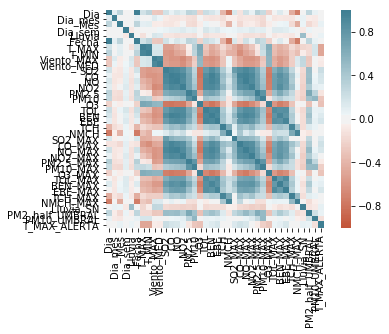

In [7]:
# calcular la matriz de correlación
# calculate the correlation matrix
corr = df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True)
# heatmap(h$correlations, Rowv = NA, Colv = NA, col = heat.colors(256), na.rm=TRUE)

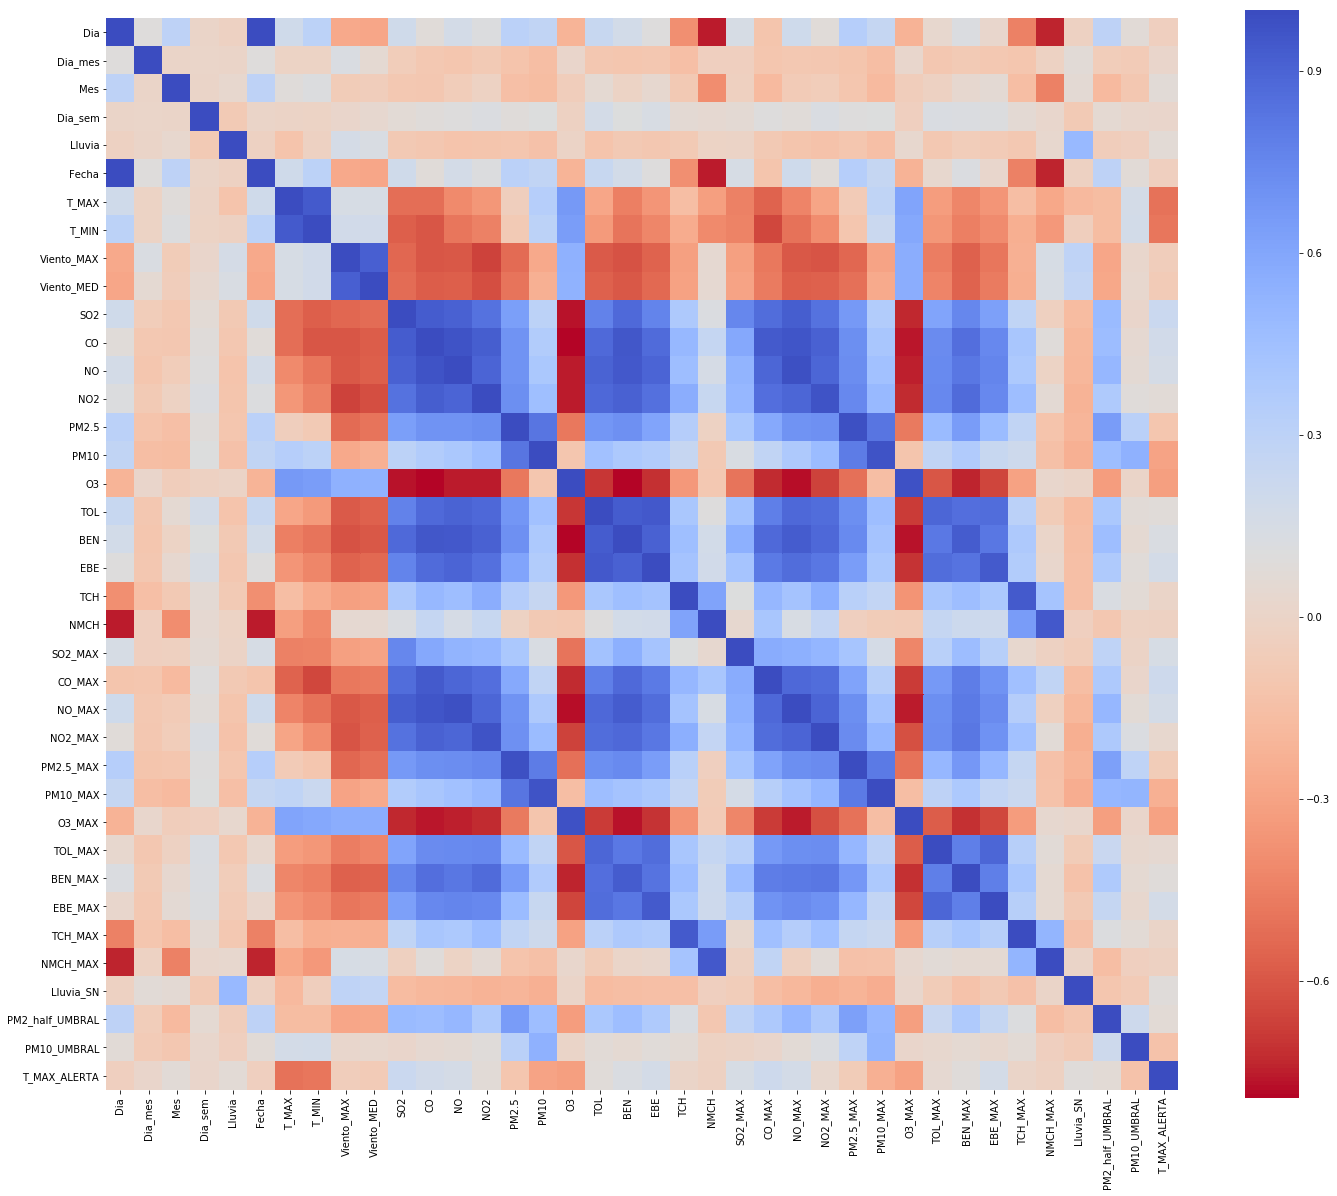

In [16]:
# calculate the correlation matrix
corr = df.corr()
f, ax2 = plt.subplots(1, figsize=(24,20))

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2,
        square=True)
# library(gplots)
# mi_color <- colorRampPalette(c("red", "black", "red"))(n = 299)
# heatmap.2(h$correlations,
          #cellnote = h$correlations,  # same data set for cell labels
          #dendrogram = "none", 
          # col=mi_color,
          # Rowv = FALSE, 
          # notecol="black",      # change font color of cell labels to black
          # density.info="none",  # turns off density plot inside color legend
          # trace="none",         # turns off trace lines inside the heat map
          # margins =c(8,8),     # widens margins around plot
          # dendrogram = "none",
          # Colv="NA")            # turn off column clustering

In [2]:
# round(h$correlations[order(abs(h$correlations[,"NO2"]),decreasing = TRUE),"NO2"],2)

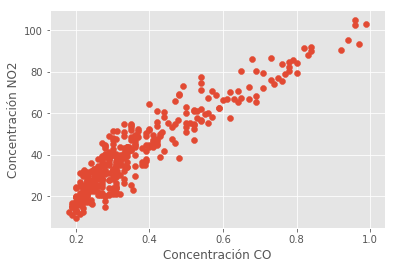

In [13]:
matplotlib.style.use('ggplot')

plt.scatter(df.CO, df.NO2)
plt.xlabel("Concentración CO")
plt.ylabel("Concentración NO2")
plt.show()

# library("ggpubr")
# ggscatter(dfMedidas, x = "CO", y = "NO2", 
#          add = "reg.line", conf.int = TRUE, 
#          cor.coef = TRUE, cor.method = "pearson",
#          xlab = "Concentración CO", ylab = "Concentración NO2")

In [11]:
round(stats.pearsonr(df['CO'], df['NO2'])[0], 2)

0.93

In [22]:
# Statsmodel
X = df["CO"]
y = df["NO2"]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

# l1 <-lm(NO2 ~ CO, data = dfMedidas)
# summary(l1)

C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NO2   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     2238.
Date:                Tue, 17 Sep 2019   Prob (F-statistic):          2.73e-157
Time:                        12:29:50   Log-Likelihood:                -1241.8
No. Observations:                 365   AIC:                             2488.
Df Residuals:                     363   BIC:                             2495.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3812      0.920      1.502      0.134      -0.427       3.190
CO           107.8521      2.280     47.305      0.000     103.369     112.336
==============================================================================
Omnibus:                        5.346   Durbin-Watson:                   0.873
Prob(Omnibus):                  0.069   Jarque-Bera (JB):                5.285
Skew:                           0.261   Prob(JB):                       0.0712
Kurtosis:                       2.724   Cond. No.                         6.80
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
X = df["Viento_MAX"]
y = df["NO2"]
X = sm.add_constant(X)


fit1 = sm.OLS(y, X).fit()
predictions = fit1.predict(X)
fit1.summary()

X2 = df[["Viento_MAX", "T_MAX"]]
y2 = df["NO2"]
X2 = sm.add_constant(X2)

fit2 = sm.OLS(y2, X2).fit()
predictions = fit2.predict(X2)
fit2.summary()

X = df[["Viento_MAX", "T_MAX","Lluvia"]]
y = df["NO2"]
X = sm.add_constant(X)

fit3 = sm.OLS(y, X).fit()
predictions = fit3.predict(X)
fit3.summary()

fit1.summary()

# fit1 <- lm(NO2 ~ Viento_MAX , data = dfMedidas)
# fit2 <- lm(NO2 ~ Viento_MAX + T_MAX, data = dfMedidas)
# fit3 <- lm(NO2 ~ Viento_MAX + T_MAX + Lluvia, data = dfMedidas)
# fit1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NO2   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     283.5
Date:                Wed, 18 Sep 2019   Prob (F-statistic):           2.01e-47
Time:                        16:08:38   Log-Likelihood:                -1495.8
No. Observations:                 365   AIC:                             2996.
Df Residuals:                     363   BIC:                             3003.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         75.8593      2.209     34.343      0.000      71.515      80.203
Viento_MAX    -1.1072      0.066    -16.838      0.000      -1.237      -0.978
==============================================================================
Omnibus:                       15.863   Durbin-Watson:                   0.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.145
Skew:                           0.521   Prob(JB):                     0.000189
Kurtosis:                       2.791   Cond. No.                         97.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
import statsmodels.formula.api as smf
lm = smf.ols("NO2 ~ Viento_MAX", df)
fit1 = lm.fit()
fit1.summary()

# Lo mismo con la parte superior
# The same with the top

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NO2   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     283.5
Date:                Wed, 18 Sep 2019   Prob (F-statistic):           2.01e-47
Time:                        13:40:36   Log-Likelihood:                -1495.8
No. Observations:                 365   AIC:                             2996.
Df Residuals:                     363   BIC:                             3003.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     75.8593      2.209     34.343      0.000      71.515      80.203
Viento_MAX    -1.1072      0.066    -16.838      0.000      -1.237      -0.978
==============================================================================
Omnibus:                       15.863   Durbin-Watson:                   0.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.145
Skew:                           0.521   Prob(JB):                     0.000189
Kurtosis:                       2.791   Cond. No.                         97.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
fit1.params
# fit1

const         75.859254
Viento_MAX    -1.107232
dtype: float64

In [29]:
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NO2   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     183.7
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           8.32e-56
Time:                        12:45:02   Log-Likelihood:                -1473.3
No. Observations:                 365   AIC:                             2953.
Df Residuals:                     362   BIC:                             2964.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         86.1814      2.562     33.640      0.000      81.143      91.219
Viento_MAX    -1.0428      0.063    -16.657      0.000      -1.166      -0.920
T_MAX         -0.5581      0.081     -6.898      0.000      -0.717      -0.399
==============================================================================
Omnibus:                       15.166   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.201
Skew:                           0.462   Prob(JB):                     0.000500
Kurtosis:                       2.620   Cond. No.                         143.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
fit2.params
# fit2

const         86.181410
Viento_MAX    -1.042835
T_MAX         -0.558074
dtype: float64

In [31]:
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NO2   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     123.3
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           5.40e-55
Time:                        12:46:03   Log-Likelihood:                -1472.4
No. Observations:                 365   AIC:                             2953.
Df Residuals:                     361   BIC:                             2968.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         86.2859      2.561     33.699      0.000      81.251      91.321
Viento_MAX    -1.0276      0.064    -16.157      0.000      -1.153      -0.903
T_MAX         -0.5740      0.082     -7.024      0.000      -0.735      -0.413
Lluvia        -0.3159      0.240     -1.315      0.189      -0.788       0.157
==============================================================================
Omnibus:                       15.166   Durbin-Watson:                   1.028
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.875
Skew:                           0.451   Prob(JB):                     0.000589
Kurtosis:                       2.595   Cond. No.                         143.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
fit3.params
# fit3

const         86.285944
Viento_MAX    -1.027632
T_MAX         -0.573975
Lluvia        -0.315864
dtype: float64

In [33]:
fit1.summary().tables[1]
# coefficients(fit1) 
# coeficientes del modelo
# coefficients of the model

,coef,std err,t,P>|t|,[0.025,0.975]
const,75.8593,2.209,34.343,0.000,71.515,80.203
Viento_MAX,-1.1072,0.066,-16.838,0.000,-1.237,-0.978


In [36]:
fit1.conf_int()

,0,1
const,71.515432,80.203076
Viento_MAX,-1.236548,-0.977916


In [74]:
fit1.fittedvalues[0:10]
# head(fitted(fit1),10) 
# valores predichos
# predicted values

0    60.358001
1    63.679698
2    60.358001
3    62.572466
4    54.821840
5    64.786931
6    59.250769
7    54.821840
8    59.250769
9    62.572466
dtype: float64

In [75]:
y[0:10]
# real values

0     95.291667
1    102.583333
2     90.125000
3     90.458333
4     84.416667
5     75.791667
6     91.791667
7     86.875000
8    102.875000
9     84.000000
Name: NO2, dtype: float64

In [124]:
fit1.resid[0:10]
# head(residuals(fit1),10) 
# residuos

0    34.933665
1    38.903635
2    29.766999
3    27.885867
4    29.594827
5    11.004736
6    32.540898
7    32.053160
8    43.624231
9    21.427534
dtype: float64

In [62]:
residuos = pd.DataFrame({"fit1real_y" : y[0:10],
                   "fit1pred_y" : fit1.fittedvalues[0:10]})
residuos

,fit1real_y,fit1pred_y
0,95.291667,60.358001
1,102.583333,63.679698
2,90.125000,60.358001
3,90.458333,62.572466
4,84.416667,54.821840
5,75.791667,64.786931
6,91.791667,59.250769
7,86.875000,54.821840
8,102.875000,59.250769
9,84.000000,62.572466


In [63]:
residuos["error"] = residuos["fit1real_y"] - residuos["fit1pred_y"]
# The same but this one is longer

In [64]:
residuos

,fit1real_y,fit1pred_y,error
0,95.291667,60.358001,34.933665
1,102.583333,63.679698,38.903635
2,90.125000,60.358001,29.766999
3,90.458333,62.572466,27.885867
4,84.416667,54.821840,29.594827
5,75.791667,64.786931,11.004736
6,91.791667,59.250769,32.540898
7,86.875000,54.821840,32.053160
8,102.875000,59.250769,43.624231
9,84.000000,62.572466,21.427534


In [97]:
sm.stats.anova_lm(fit1)
# anova(fit1) # tabla anova  

,df,sum_sq,mean_sq,F,PR(>F)
Viento_MAX,1.0,60549.349420,60549.34942,283.511312,2.007545e-47
Residual,363.0,77525.703168,213.56943,NaN,NaN


In [105]:
# vcov(fit1) # matriz de covarianza
# Normally in python we use np.cov()

In [108]:
sm.stats.anova_lm(fit1,fit2,fit3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,363.0,77525.703168,0.0,NaN,NaN,NaN
1,362.0,68518.301437,1.0,9007.401731,47.684302,2.257441e-11
2,361.0,68191.667020,1.0,326.634418,1.729171,1.893515e-01


In [127]:
X = df[["Viento_MAX", "T_MAX","Lluvia_SN"]]
y = df["NO2"]
X = sm.add_constant(X)

fit4 = sm.OLS(y, X).fit()
predictions = fit4.predict(X)

sm.stats.anova_lm(fit1,fit2,fit4)

# fit4 <- lm(NO2 ~ Viento_MAX + T_MAX + Lluvia_SN, data = dfMedidas)
# anova(fit1,fit2,fit4)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,363.0,77525.703168,0.0,NaN,NaN,NaN
1,362.0,68518.301437,1.0,9007.401731,48.382336,1.648653e-11
2,361.0,67207.834208,1.0,1310.467230,7.039041,8.327472e-03


In [128]:
fit4.summary()
# step(lm(NO2 ~ Viento_MAX + T_MAX + Lluvia_SN, data = dfMedidas), direction = "both")

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NO2   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     126.9
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           3.95e-56
Time:                        16:53:58   Log-Likelihood:                -1469.8
No. Observations:                 365   AIC:                             2948.
Df Residuals:                     361   BIC:                             2963.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         86.5788      2.545     34.017      0.000      81.574      91.584
Viento_MAX    -0.9863      0.066    -15.024      0.000      -1.115      -0.857
T_MAX         -0.6117      0.083     -7.393      0.000      -0.774      -0.449
Lluvia_SN     -5.1813      1.953     -2.653      0.008      -9.022      -1.341
==============================================================================
Omnibus:                       15.115   Durbin-Watson:                   1.036
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.158
Skew:                           0.428   Prob(JB):                     0.000843
Kurtosis:                       2.553   Cond. No.                         144.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Selección de atributos - Attribute Selection

In [15]:
X = df[["Viento_MAX", "T_MAX","Lluvia","Lluvia_SN"]]
y = df["NO2"]
X = sm.add_constant(X)

fit5 = sm.OLS(y, X).fit()
predictions = fit5.predict(X)

In [16]:
# As I understand there is no function to feature importance for linear regression

## Regresión no Lineal - Non-Linear Regression

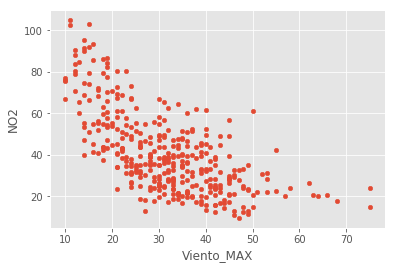

In [21]:
matplotlib.style.use('ggplot')

plt.scatter(df.Viento_MAX, df.NO2,s=20)
plt.xlabel("Viento_MAX")
plt.ylabel("NO2")
plt.show()

# ggplot(dfMedidas, aes(x = Viento_MAX, y = NO2)) + geom_point(size=0.5)

In [22]:
# In python there is no function to apply directly nonlinear regression
# It can do least-squares curve fitting, but it only provides you with parameter estimates
# I couldn't convert them

## Regresión de atributos no continuos - Regression of non-continuous attributes

In [69]:
name = ['BP', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(fit2.resid, fit2.model.exog)
lzip(name, test)

# library(lmtest)
# bptest(fit2) #test Breush-Pagan

[('BP', 15.522936086277209),
 ('p-value', 0.0004258309833427634),
 ('f-value', 8.039587491526497),
 ('f p-value', 0.0003835061398355114)]

In [79]:
dw = durbin_watson(fit2.resid)
# dwtest(fit2) #test Durbin-Watson

In [83]:
dw

1.0089192323964886

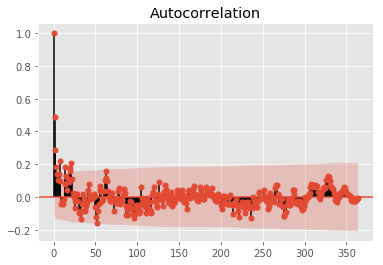

In [87]:
plot_acf(fit2.resid)
plt.show()
# acf(fit2$residuals)

In [100]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif["features"] = X2.columns

# vif(fit2)

In [101]:
vif.round(10)

,VIF Factor,features
0,12.656265,const
1,1.022739,Viento_MAX
2,1.022739,T_MAX


In [102]:
df.Viento_MAX.var()
# var(Viento_MAX)

135.68460033117555

In [104]:
df.T_MAX.var()
# var(T_MAX)

81.2604904410658

In [110]:
anderson(fit2.resid)
# library(nortest)
# ad.test(fit2$residuals)

AndersonResult(statistic=2.923544047024052, critical_values=array([0.57 , 0.649, 0.779, 0.908, 1.08 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [113]:
# pip install scikit-gof

  Stored in directory: C:\Users\Lenovo\AppData\Local\pip\Cache\wheels\9b\5a\a9\879f120407e0fc948df181588ac398c01a376be97f4e5db446
Successfully built scikit-gof
Note: you may need to restart the kernel to use updated packages.


In [123]:
cvm_test(fit2.resid, uniform(0, 5))
# cvm.test(fit2$residuals)

GofResult(statistic=27.274197155741273, pvalue=4.361479708170357e-06)

In [137]:
print(sm_diagnostic.kstest_normal(x = fit2.resid, dist = "norm"))
# lillie.test(fit2$residuals)

(0.08439931374159976, 1.464625965975629e-06)


In [140]:
# Con la función gvlma puedes integrarlos todos -R
# With gvlma function you can integrate them all

## Modelos lineales generalizados

In [12]:
X = df[["Viento_MAX", "T_MAX"]]
y = df["NO2"]
X = sm.add_constant(X)

fit_glm = sm.GLM(y, X, family=sm.families.Gaussian()).fit()

# fit_glm <- glm(NO2 ~ Viento_MAX + T_MAX, data = dfMedidas, family = gaussian)
# fit_glm

In [13]:
fit_glm

In [14]:
fit_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    NO2   No. Observations:                  365
Model:                            GLM   Df Residuals:                      362
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                          189.28
Method:                          IRLS   Log-Likelihood:                -1473.3
Date:                Thu, 19 Sep 2019   Deviance:                       68518.
Time:                        11:16:39   Pearson chi2:                 6.85e+04
No. Iterations:                     3   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         86.1814      2.562     33.640      0.000      81.160      91.203
Viento_MAX    -1.0428      0.063    -16.657      0.000      -1.166      -0.920
T_MAX         -0.5581      0.081     -6.898      0.000      -0.717      -0.400
==============================================================================
"""

In [20]:
fit_glm2 = sm.GLM(y, X, family=sm.families.Gaussian(sm.families.links.log)).fit()

# fit_glm2 <- glm(NO2 ~ Viento_MAX + T_MAX, data = dfMedidas, family = gaussian(link = "log"))
# fit_glm2 

In [21]:
fit_glm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    NO2   No. Observations:                  365
Model:                            GLM   Df Residuals:                      362
Model Family:                Gaussian   Df Model:                            2
Link Function:                    log   Scale:                          166.79
Method:                          IRLS   Log-Likelihood:                -1450.2
Date:                Thu, 19 Sep 2019   Deviance:                       60379.
Time:                        11:47:55   Pearson chi2:                 6.04e+04
No. Iterations:                     7   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8266      0.048    100.677      0.000       4.733       4.921
Viento_MAX    -0.0288      0.002    -17.249      0.000      -0.032      -0.026
T_MAX         -0.0125      0.002     -6.064      0.000      -0.017      -0.008
==============================================================================
"""

In [20]:
X = df[["Viento_MAX", "T_MAX"]]
y = df["PM2_half_UMBRAL"]
X = sm.add_constant(X)

fit_log = sm.GLM(y, X, family=sm.families.Binomial())
fit_log_fit = fit_log.fit()
# fit_log <- glm(PM2.5_UMBRAL ~ Viento_MAX + T_MAX, data = dfMedidas, family = binomial)
# summary(fit_log) 

In [21]:
fit_log_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        PM2_half_UMBRAL   No. Observations:                  365
Model:                            GLM   Df Residuals:                      362
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -50.102
Date:                Thu, 19 Sep 2019   Deviance:                       100.20
Time:                        12:44:46   Pearson chi2:                 3.38e+03
No. Iterations:                     8   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3504      0.968      2.429      0.015       0.454       4.247
Viento_MAX    -0.1866      0.048     -3.924      0.000      -0.280      -0.093
T_MAX         -0.0546      0.049     -1.118      0.264      -0.150       0.041
==============================================================================
"""

In [ ]:
# Didn't finish

In [26]:
X = df[["Viento_MAX", "T_MAX", "Lluvia_SN"]]
y = df["PM2.5_MAX"]
X = sm.add_constant(X)

fit_poi = sm.GLM(y, X, family=sm.families.Poisson()).fit()

# fit_poi <- glm(PM2.5_MAX ~ Viento_MAX + T_MAX + Lluvia_SN, data = dfMedidas, family = poisson)
# summary(fit_poi) 

In [27]:
fit_poi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              PM2.5_MAX   No. Observations:                  365
Model:                            GLM   Df Residuals:                      361
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1176.5
Date:                Thu, 19 Sep 2019   Deviance:                       756.12
Time:                        12:52:52   Pearson chi2:                     811.
No. Iterations:                     4   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3530      0.047     71.540      0.000       3.261       3.445
Viento_MAX    -0.0246      0.001    -17.326      0.000      -0.027      -0.022
T_MAX          0.0017      0.002      0.992      0.321      -0.002       0.005
Lluvia_SN     -0.1021      0.042     -2.454      0.014      -0.184      -0.021
==============================================================================
"""

In [30]:
X = df[["Viento_MAX", "Lluvia_SN"]]
y = df["PM2.5_MAX"]
X = sm.add_constant(X)

fit_poi2 = sm.GLM(y, X, family=sm.families.Poisson()).fit()
# fit_poi2 <- glm(PM2.5_MAX ~ Viento_MAX + Lluvia_SN, data = dfMedidas, family = poisson)
# summary(fit_poi2) 

In [31]:
fit_poi2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              PM2.5_MAX   No. Observations:                  365
Model:                            GLM   Df Residuals:                      362
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1177.0
Date:                Thu, 19 Sep 2019   Deviance:                       757.10
Time:                        13:08:35   Pearson chi2:                     812.
No. Iterations:                     4   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3778      0.040     85.408      0.000       3.300       3.455
Viento_MAX    -0.0242      0.001    -18.054      0.000      -0.027      -0.022
Lluvia_SN     -0.1117      0.040     -2.759      0.006      -0.191      -0.032
==============================================================================
"""